In [12]:
# Eliseo Rico

# Activity 6: Task 1

In [1]:
# Import required libraries
import pandas as pd  # Used for data manipulation and analysis
import statsmodels.api as sm  # Provides classes and functions for the estimation of many different statistical models
from sklearn.model_selection import train_test_split  # Function to split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, confusion_matrix  # Import accuracy measurement and confusion matrix calculation functions
from sklearn.metrics import roc_curve, roc_auc_score  # Import functions for Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) score
import matplotlib.pyplot as plt  # For generating plots

In [2]:
# Load and prepare the dataset
t_df = pd.read_csv('Social_Network_Ads.csv', index_col = 'User ID')  # Load the Titanic dataset, setting 'PassengerId' as the index
t_df.dropna(inplace=True)  # Remove rows with any missing values to ensure data integrity for modeling

In [3]:
# Convert categorical variables into numerical format for model compatibility
t_df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)  # Convert 'Sex' into binary variables (male=1, female=0)

In [4]:
# Feature selection and dataset splitting
X = t_df.drop(columns=['Purchased'])  # Define feature variables (independent variables)
y = t_df['Purchased']  # Define the target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  # Split data into 70% training and 30% testing sets

In [5]:
# Model fitting
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)  # Fit a logistic regression model using the training set
print(logmodel.summary())  # Display the summary statistics of the logistic regression model

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.4525
Time:                        22:50:28   Log-Likelihood:                -99.251
converged:                       True   LL-Null:                       -181.29
Covariance Type:            nonrobust   LLR p-value:                 2.428e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.2540      1.384     -8.131      0.000     -13.967      -8.541
Gender              0.2586      0.361      0.717      0.473      -0.448       0.965
Age                 0.2042      

In [6]:
# Predictions and model evaluation
predictions = logmodel.predict(sm.add_constant(X_test))  # Predict survival using the test set
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]  # Convert probabilities to binary outcomes based on a threshold of 0.5

In [7]:
# Calculate and print accuracy and confusion matrix to evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, bin_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, bin_predictions))

Accuracy Score: 0.8333333333333334
Confusion Matrix:
 [[71  4]
 [16 29]]


In [8]:
# Calculate and plot ROC curve and AUC score to evaluate the model's ability to distinguish between classes
fpr, tpr, thresholds = roc_curve(y_test, predictions)  # Calculate False Positive Rate, True Positive Rate, and thresholds
roc_auc = roc_auc_score(y_test, predictions)  # Calculate the Area Under the Curve (AUC) for ROC

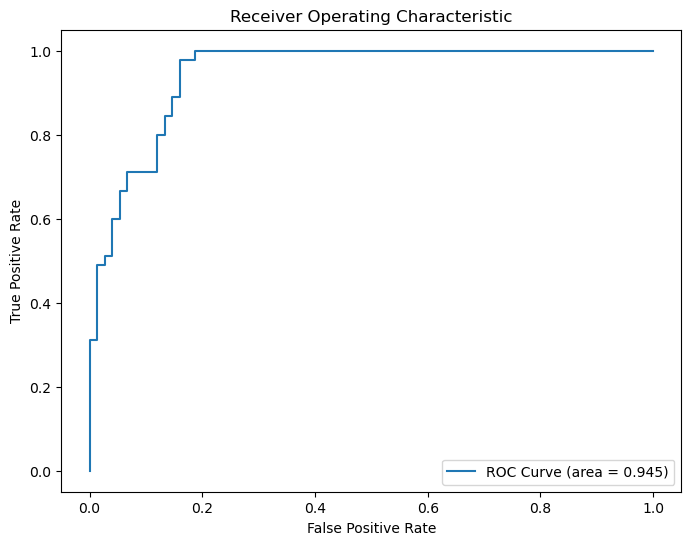

In [9]:
# Plotting ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.3f})')  # Plot the ROC curve
plt.title('Receiver Operating Characteristic')  # Title of the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc="lower right")  # Position the legend
plt.show()  # Display the plot